In [1]:
import numpy as np
import torch
from sbi.inference.base import infer
from sbi import utils as utils
from sbi import analysis as analysis
from simulators import simulator_var
from spectralcomponents import PowerLaw, GaussianEmissionLine


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-17 14:05:05.334776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
c1 = PowerLaw()
true_params = (1, 1)
prior_min = [0.1, 0.1]
prior_max = [2.0, 2.0]
prior = utils.torchutils.BoxUniform(
    low=torch.as_tensor(prior_min), high=torch.as_tensor(prior_max)
)

def simulate_simple(params):
    return simulator_var(c1, 1000, (params))

def compress_simple(params):
    output = np.zeros(5)
    data = simulate_simple(params)
    for bin_index in data:
        output[bin_index // 200] += 1
    return output

posterior = infer(
    compress_simple, prior, method="SNPE", num_simulations=100, num_workers=4
)



Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]2024-01-17 14:21:50.973961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 14:21:50.975583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 14:21:50.979660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instr

 Neural network successfully converged after 62 epochs.

In [13]:
samples = posterior.sample((10000,), x=compress_simple(true_params))

Drawing 10000 posterior samples: 10671it [00:00, 33866.96it/s]                          


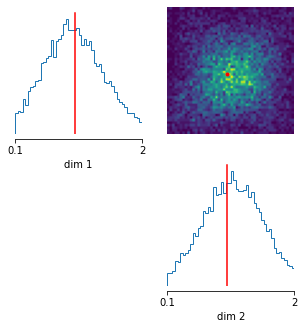

In [14]:
fig, axes = analysis.pairplot(
    samples,
    limits=[[0.1, 2], [0.1, 2]],
    ticks=[[0.1, 2], [0.1, 2]],
    figsize=(5, 5),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
);